In [1]:
from PIL import Image
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
def median_filter1(image, kernel_size = 3):
    """
    Applies a kernel_size x kernel_size median filter to the image.
    The kernel size must be an odd number.
    Additionally, the image is padded first with symmetric padding
    Args:
        image: A PIL Image object.

    Returns:
        A PIL Image object with the median filter applied.
    """

    # Convert the image to a NumPy array
    image_array = np.array(image)

    # Create a new array for the filtered image
    filtered_image = np.zeros_like(image_array)

    # Half kernel length exluding the center
    edge_size = kernel_size // 2

    # pad the image_array
    image_array = np.pad(image_array, pad_width=edge_size, mode='symmetric')

    # Get image dimensions (after padding)
    rows, cols = image_array.shape

    # Iterate over the image pixels, excluding the borders
    for i in range(edge_size, rows-edge_size):
        for j in range(edge_size, cols - edge_size):
            # Extract a kernel_size x kernel_size neighborhood around the current pixel
            neighborhood = image_array[i-edge_size:i+edge_size+1, j-edge_size:j+edge_size+1]
            # Calculate the median of the neighborhood
            median = np.median(neighborhood)
            filtered_image[i-edge_size, j-edge_size] = median

    # Convert back to PIL image
    filtered_image = Image.fromarray(filtered_image.astype(np.uint8))
    return filtered_image

In [3]:
def preview(img, gray=True):
    """
    Displays an image. If the image is grayscale, it will be shown in grayscale mode.

    Args:
        img: The image to display (can be a NumPy array or PIL Image).
        gray: Boolean flag to indicate if the image should be displayed in grayscale.
    """
    # Ensure img is a NumPy array if it's a PIL Image
    if isinstance(img, Image.Image):
        img = np.array(img)

    # Check the shape of the image data
    if gray:
        if img.ndim != 2:
            raise TypeError("Invalid shape for grayscale image: expected 2D array.")
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    else:
        if img.ndim != 3 or img.shape[-1] not in [3, 4]:
            raise TypeError("Invalid shape for color image: expected 3D array with 3 or 4 channels.")
        plt.imshow(img)

    plt.axis('off')  # Hide axis
    plt.show()

In [4]:
def convert_to_grayscale(img):
    return img.convert("L")


In [5]:
img = Image.open('/content/org2.png')

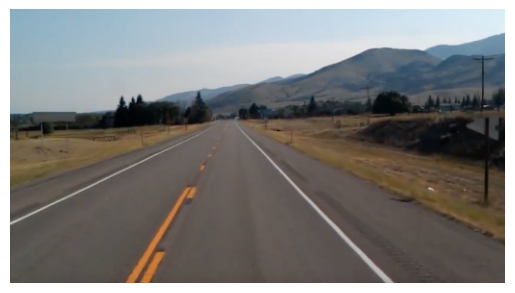

image size = (516, 285)


In [6]:
preview(img,gray = False)
print(f"image size = {img.size}")

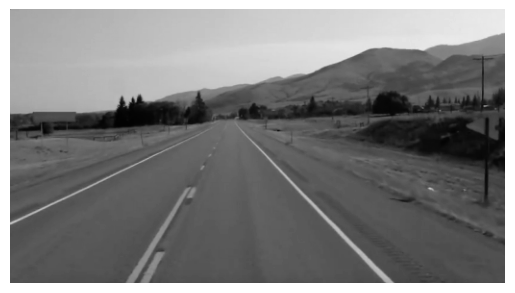

In [7]:
#convert to grayscale image
gray_img = convert_to_grayscale(img)
preview(gray_img,gray = True)

#Applying the median filter to our image

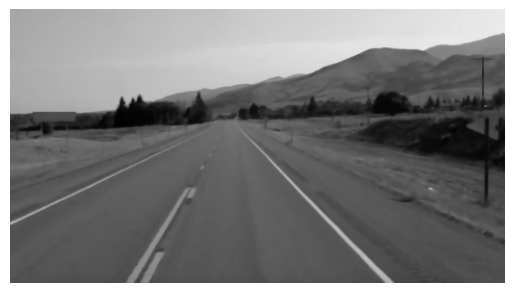

In [8]:
img_array = np.array(gray_img)
smoothed_image_1 = median_filter1(img_array, kernel_size=3)
smoothed_img_array = np.array(smoothed_image_1)
preview(smoothed_image_1,gray=True)


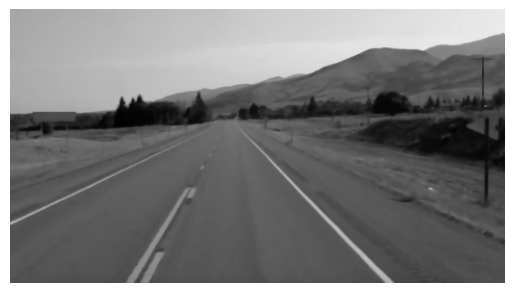

In [9]:
#built-in median filtetr for grayscale image
from scipy.ndimage import median_filter

smoothed_image = median_filter(img_array, size=3)
preview(smoothed_image,gray=True)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


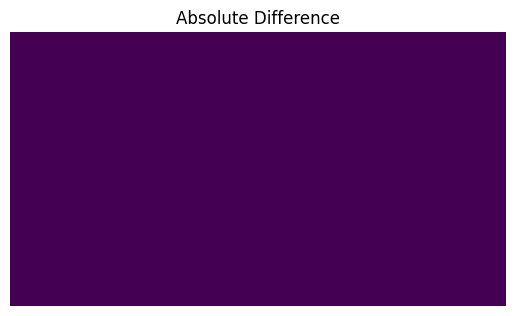

In [10]:
#comparing our median filter with the built-in median filter.
print(smoothed_image - smoothed_image_1)

# Compute the absolute difference
#diff = np.abs(smoothed_image - smoothed_image_1)
diff = smoothed_image - smoothed_image_1

# check = np.array_equal(smoothed_image, smoothed_image_1)
# print(check)

# check2 = np.any(diff)
# print(check2)

# Display the difference
plt.imshow(diff)
plt.title("Absolute Difference")
plt.axis("off")
plt.show()

#Canny's Algorithm for Edge Detection

In [11]:
def gaussian_blur(img, kernel_size=5, sigma=1.0):
    # Apply Gaussian Blur to reduce noise
    return cv.GaussianBlur(img, (kernel_size, kernel_size), sigma)

In [12]:
from scipy.signal import correlate2d

def compute_gradients(img):

    Kx = np.array(
        [[-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]], np.float32
    )

    Ky = np.array(
        [[-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]], np.float32
    )

    # Gradient_Y = correlate2d(img, Ky)
    # Gradient_X = correlate2d(img, Kx)

    Gx = cv.filter2D(img, -1, Kx)
    Gy = cv.filter2D(img, -1, Ky)

    # Calculate gradient magnitude and direction
    magnitude = np.sqrt(Gx**2 + Gy**2)
    EPS = np.finfo(float).eps # used to tackle the division by zero error
    direction = np.arctan2(Gy, Gx + EPS)  # in radians


    fig = plt.figure()
    plt.subplot(1,5,1)
    plt.imshow(Gy, cmap='gray')
    plt.title('Gradient$_y$')
    plt.subplot(1,5,2)
    plt.imshow(Gx, cmap='gray')
    plt.title('Gradient$_x$')

    fig.set_figwidth(20)
    fig.set_figheight(23)


    plt.subplot(1, 5, 3)
    plt.title("Original Grayscale Image")
    plt.imshow(img, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 5, 4)
    plt.title("Gradient Magnitude")
    plt.imshow(magnitude, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 5, 5)
    plt.title("Gradient Direction")
    plt.imshow(direction, cmap="hsv")  # hsv colormap for direction visualization
    plt.axis("off")

    plt.show()
    return magnitude, direction
    # Compute gradients using Sobel operator
    #sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)

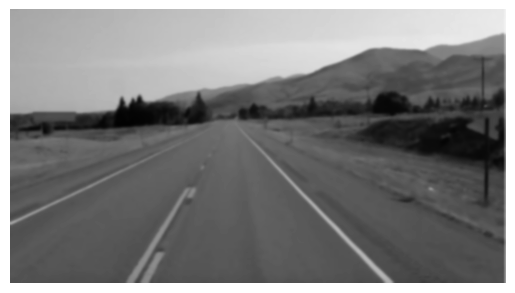

In [13]:
blurred_img = gaussian_blur(smoothed_img_array,kernel_size=5,sigma=1.0)
preview(blurred_img, gray=True)

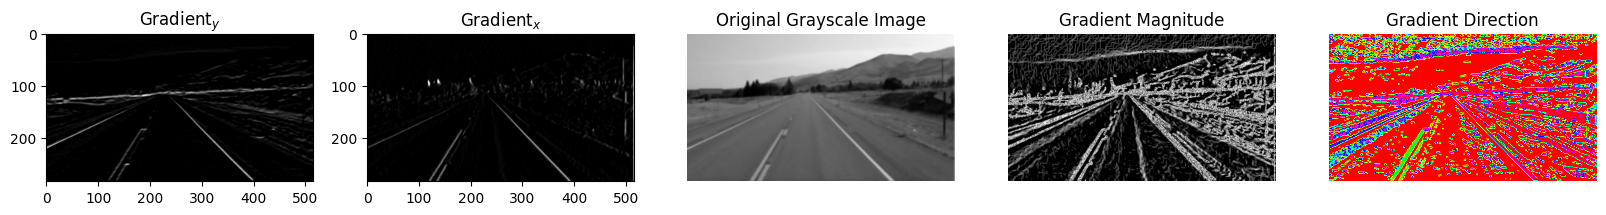

(array([[ 0.   ,  0.   ,  0.   , ...,  8.   ,  0.   ,  0.   ],
        [ 4.   ,  4.   ,  4.   , ...,  4.242,  0.   ,  0.   ],
        [ 4.   ,  4.   ,  4.   , ..., 15.234,  2.   ,  2.   ],
        ...,
        [ 0.   ,  0.   ,  0.   , ..., 15.266,  7.   ,  0.   ],
        [ 4.   ,  4.   ,  4.   , ...,  8.25 ,  5.   ,  0.   ],
        [ 0.   ,  0.   ,  0.   , ...,  8.25 ,  4.   ,  0.   ]],
       dtype=float16),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [1.57079633, 1.57079633, 1.57079633, ..., 0.0434509 , 0.        ,
         0.        ],
        [1.57079633, 1.57079633, 1.57079633, ..., 0.09065989, 0.06241881,
         1.57079633],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [1.57079633, 1.57079633, 1.57079633, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.       

In [21]:
compute_gradients(blurred_img)

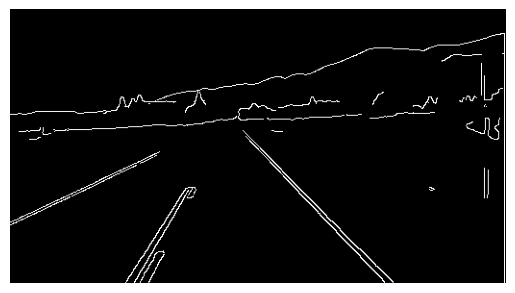

In [15]:
#built-in canny's algorithm
t_lower = 100 # Lower Threshold
t_upper = 200 # Upper threshold
aperture_size = 5 # Aperture size
L2Gradient = True # Boolean


# 170 , 220
# Applying the Canny Edge filter with L2Gradient = True
edge = cv.Canny(smoothed_img_array, t_lower, t_upper, L2gradient = L2Gradient )
preview(edge,gray=True)

# plt.imshow(edge)

# plt.title("Canny edge detection.")
# plt.axis("off")
# plt.show()


width = 516,height = 285


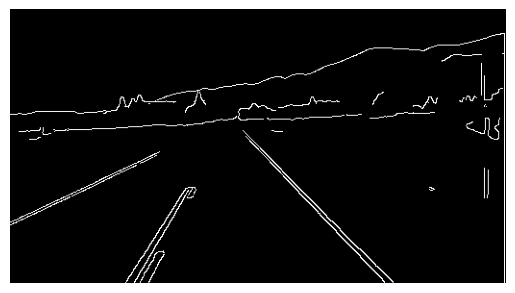

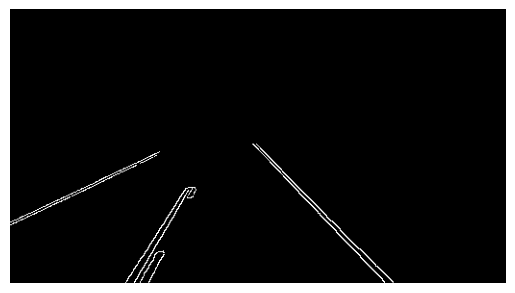

In [16]:
# Step 3: Define Region of Interest (ROI)
height, width = edge.shape
mask = np.zeros_like(edge)

print(f'width = {width},height = {height}')
preview(edge)

# Define a polygon to mask only the region of interest (ROI)
polygon = np.array([[
    (0, height),               # Bottom-left corner
    (400, height),           # Bottom-right corner
    (400, 140),   # Right-side cut-off
    (0, 140)        # Left-side cut-off
]], np.int32)

# Fill the polygon with white color
cv.fillPoly(mask, polygon, 255)
masked_edges = cv.bitwise_and(edge, mask)
preview(masked_edges,gray=True)

# plt.imshow(masked_edges)

# plt.title("ROI output.")
# plt.axis("off")
# plt.show()

#Hough Transform

In [24]:
#2.3.1 Accumlation into (rho,theta) space using Hough Transform

'''
step 1:

initialize the accumlator array H(theta,rho) to all zeros

range of theta: 0 - 180 -> if step size = 15, then dim1 = 180/15 = 12

range of rho: 0 - sqrt(W^2 + H^2) -> 589.47, step_size for rho = ?
'''

theta_step_size = 15
H = np.zeros((180 // theta_step_size,int(math.sqrt(width ** 2 + height ** 2))))
#print(H.shape)

#step 2:
points = np.column_stack(np.where(masked_edges == 255))
#print(points)


for point in points:
  x, y = point[0],point[1]  # Extract x and y coordinates
  #if x != 0 or y != 0:
  #print(x,y)

  for theta in range(0,180,theta_step_size):
    rho = x * np.cos(theta * math.pi / 180) + y * np.sin(theta  * math.pi / 180)
    H[theta // theta_step_size, int(rho)] += 1
    #print(f'theta = {theta},theta in array:{theta // theta_step_size}, rho = {rho}')

    #print(H[theta // theta_step_size, int(rho)]

#print(H)

max_votes = H.max()
print('max votes = ',int(max_votes))
max_line = np.where(H == max_votes)
theta = max_line[0][0] * theta_step_size
rho = max_line[1][0]
print(f'theta = {theta},rho = {rho}')
#print(f'theta = {max_line[0]} degrees, rho = {max_line[1]}')



# max_votes = np.column_stack(np.where(H == 1))
# print(max_votes)

max votes =  116
theta = 135,rho = 80


0 113
113 0


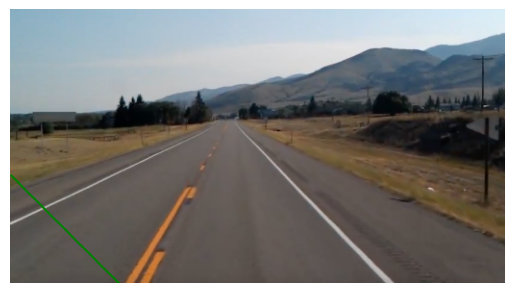

In [43]:
from PIL import Image, ImageDraw

image = Image.new("RGB", (width, height), "black")
draw = ImageDraw.Draw(image)

# Convert to pixel coordinates (make sure they are within image bounds)
x1 = 0
y1 = rho / np.sin(theta * np.pi / 180)
y1 = int(y1)
print(x1,y1)
y2 = 0
x2 = rho / np.cos((theta-180) * np.pi / 180)
x2, y2 = int(x2), int(y2)
print(x2,y2)

# Clip coordinates to be within the image dimensions
y1 = np.clip(y1, 0, height - 1)
y2 = np.clip(y2, 0, height - 1)


draw.line((x1, y1, x2, y2), fill=(0, 128, 0), width=50)

# # Convert to NumPy array for displaying with Matplotlib
image_np = np.array(img)

# Display the image
plt.imshow(image_np)
plt.axis('off')
plt.show()

0 113
200 313


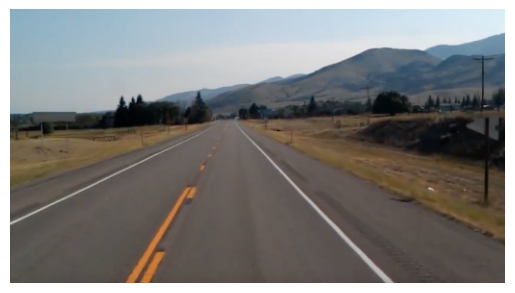

In [36]:
from PIL import Image, ImageDraw

img = Image.open('/content/org2.png')
original_image = image.copy()

image = Image.new("RGB", (width, height), "black")
draw = ImageDraw.Draw(image)

# Convert to pixel coordinates (make sure they are within image bounds)
x1 = 0
y1 = rho / np.sin(theta * np.pi / 180)
y1 = int(y1)
print(x1,y1)
# y2 = 0
# x2 = rho / np.cos((theta-180) * np.pi / 180)
# x2, y2 = int(x2), int(y2)
# print(x2,y2)

x2 = 200
y2 = (rho - x2 * np.cos(theta * np.pi / 180) ) / (np.sin(theta * np.pi / 180))
x2, y2 = int(x2), int(y2)
print(x2,y2)

# Clip coordinates to be within the image dimensions
y1 = np.clip(y1, 0, height - 1)
y2 = np.clip(y2, 0, height - 1)


draw.line((x1, y1, x2, y2), fill=(0, 128, 0), width=5)

# # Convert to NumPy array for displaying with Matplotlib
image_np = np.array(img)

# Display the image
plt.imshow(image_np)
plt.axis('off')
plt.show()

0 113
113 0


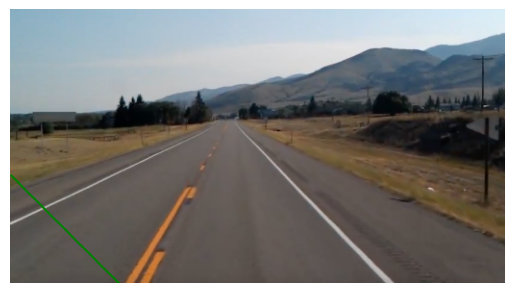

In [45]:
from PIL import Image, ImageDraw

# ... (previous code) ...

img = Image.open('/content/org2.png')
original_image = image.copy()

# Convert the original image to RGB if it's not already
if img.mode != 'RGB':
  img = img.convert('RGB')

draw = ImageDraw.Draw(img)  # Draw on the original image

# Convert to pixel coordinates (make sure they are within image bounds)
x1 = 0

y1 = rho / np.sin(theta * np.pi / 180)
y1 = int(y1)
print(x1,y1)
y2 = 0
x2 = rho / np.cos((theta-180) * np.pi / 180)
x2, y2 = int(x2), int(y2)
print(x2,y2)
# x2 = 200
# rho = x2 cos theta + y2 sin theta
# y2 = (rho - x2 * np.cos(theta * np.pi / 180) ) / (np.sin(theta * np.pi / 180))
# x2, y2 = int(x2), int(y2)
# print(x2,y2)

# Clip coordinates to be within the image dimensions
y1 = np.clip(y1, 0, height - 1)
y2 = np.clip(y2, 0, height - 1)

y1 = height - y1
y2 = height - y2

draw.line((x1, y1, x2, y2), fill=(0, 128, 0), width=2)

# # Convert to NumPy array for displaying with Matplotlib
image_np = np.array(img)

# Display the modified original image
plt.imshow(np.array(img))  # Convert img to a NumPy array
plt.axis('off')
plt.show()